<a href="https://colab.research.google.com/github/vinayshanbhag/math/blob/master/rf_mixers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RF Mixers


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

## Sinusoid



In [25]:
def sinusoid(f, phase=0, dur=3.0, sr=22050):
  ts = int(dur*sr)
  spc = int(sr/f)
  pts = np.linspace(phase, 2*np.pi*ts/spc+ phase, ts)
  return np.sin(pts)

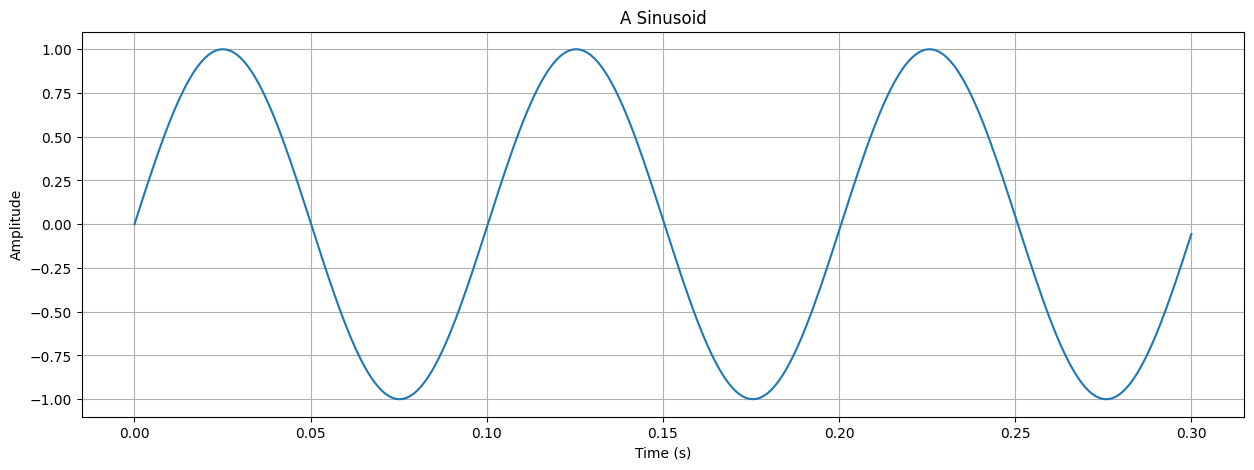

In [27]:
f = 10 #Hz
sr=f*100 #sample rate
y = sinusoid(f=f, phase=0,dur=3.0, sr=sr)
plot_lim = sr//f*3
plt.figure(figsize=(15,5))

x = np.linspace(0, len(y[:plot_lim])/sr, len(y[:plot_lim]))

plt.plot(x, y[:plot_lim])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid();
plt.title('A Sinusoid');

### Ideal mixer

An ideal mixer multiplies two input signals. The output contains sum and difference components.

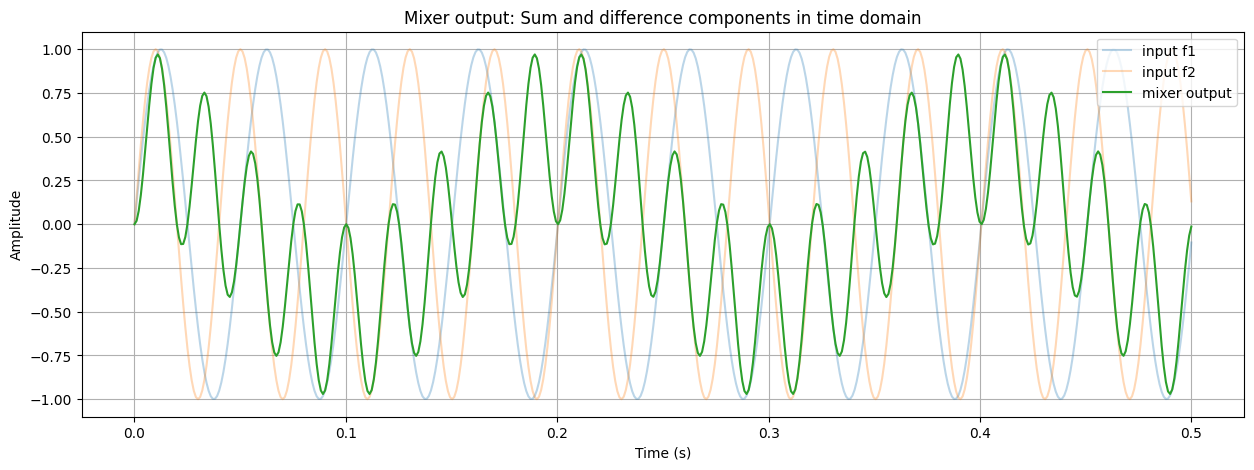

In [45]:
f1,f2 = 20,25 #Hz
sr=1000 #sample rate
y1 = sinusoid(f=f1, phase=0,dur=3.0, sr=sr)
y2 = sinusoid(f=f2, phase=0,dur=3.0, sr=sr)
y3 = y1*y2 #mixer output
plot_lim = sr//f1*10
plt.figure(figsize=(15,5))

x = np.linspace(0, len(y1[:plot_lim])/sr, len(y1[:plot_lim]))

plt.plot(x, y1[:plot_lim], label='input f1', alpha=0.3)
plt.plot(x, y2[:plot_lim], label='input f2', alpha=0.3)
plt.plot(x, y3[:plot_lim], label='mixer output')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid();
plt.title('Mixer output: Sum and difference components in time domain');

The output shows sum and difference components in frequency domain.

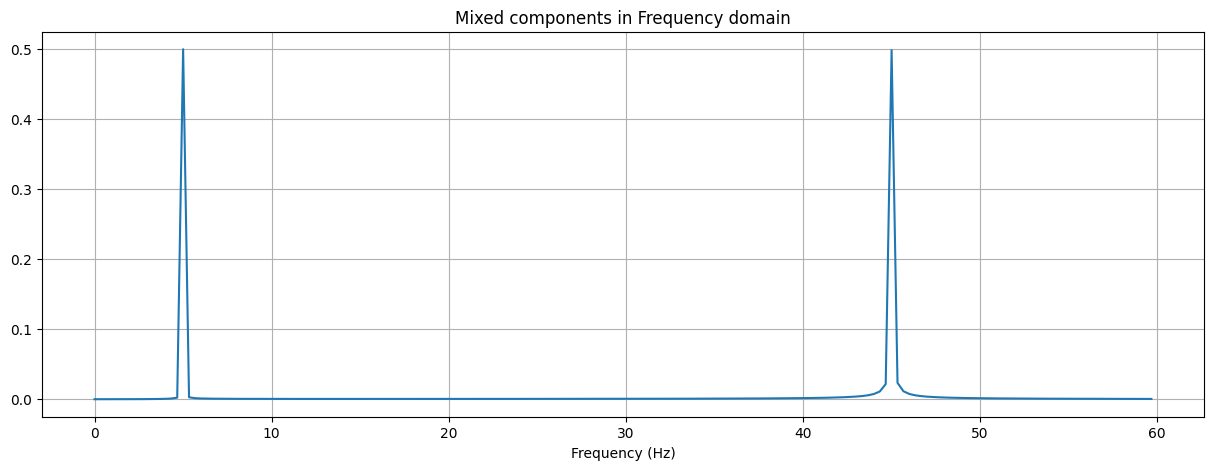

In [46]:
N = len(y3)
T = 1.0 / sr
yf = np.fft.fft(y3)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.figure(figsize=(15,5))
plot_lim = (f1+f2)*4
plt.plot(xf[:plot_lim], (2/N*np.abs(yf[:N//2]))[:plot_lim])
plt.title('Mixed components in Frequency domain')
plt.xlabel("Frequency (Hz)")
plt.grid()
plt.show()

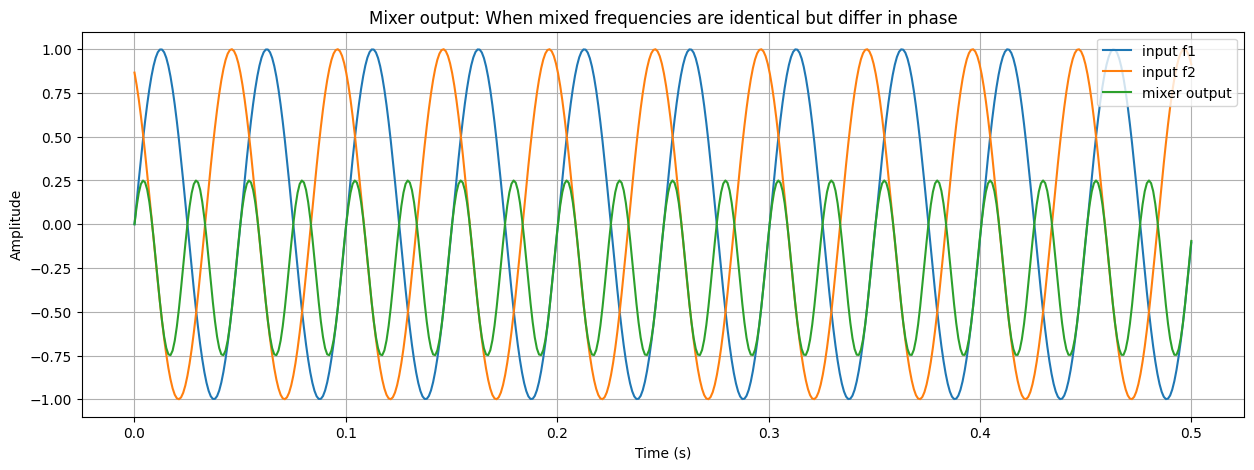

In [47]:
f1,f2 = 20,20 #Hz
sr=1000 #sample rate
y1 = sinusoid(f=f1, phase=0,dur=3.0, sr=sr)
y2 = sinusoid(f=f2, phase=2*np.pi/3,dur=3.0, sr=sr)
y3 = y1*y2 #mixer output
plot_lim = sr//f1*10
plt.figure(figsize=(15,5))

x = np.linspace(0, len(y1[:plot_lim])/sr, len(y1[:plot_lim]))

plt.plot(x, y1[:plot_lim], label='input f1')
plt.plot(x, y2[:plot_lim], label='input f2')
plt.plot(x, y3[:plot_lim], label='mixer output')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid();
plt.title('Mixer output: When mixed frequencies are identical but differ in phase');

When mixed frequencies are identical, in addition to the sum component a DC component shows up, whose magnitude is dependent on the phase relationship between the two inputs.

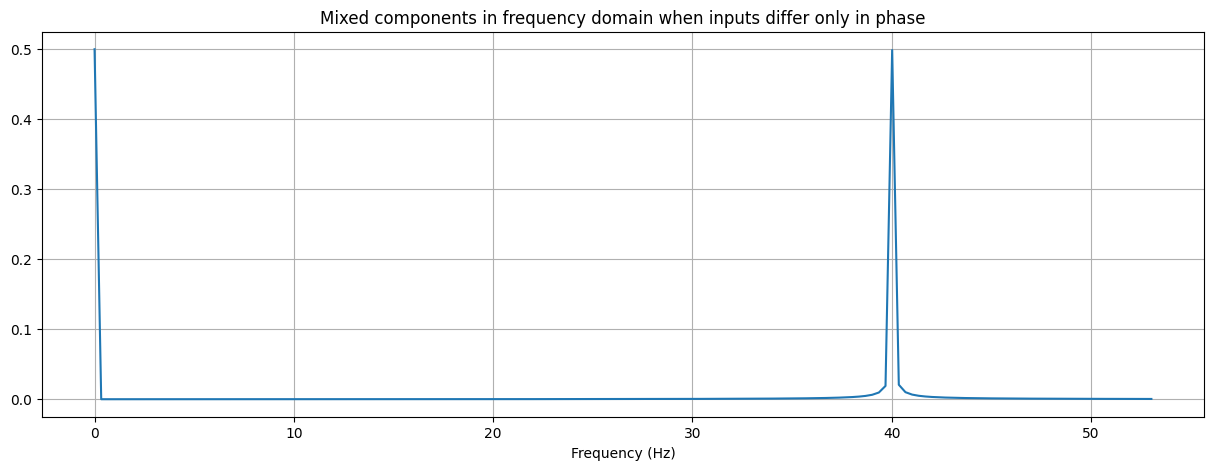

In [49]:
N = len(y3)
T = 1.0 / sr
yf = np.fft.fft(y3)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.figure(figsize=(15,5))
plot_lim = (f1+f2)*4
plt.plot(xf[:plot_lim], (2/N*np.abs(yf[:N//2]))[:plot_lim])
plt.title('Mixed components in frequency domain when inputs differ only in phase')
plt.xlabel("Frequency (Hz)")
plt.grid()
plt.show()